In [1]:
from uninaannpy import neural_network as nn
from uninaannpy import error_functions as ef
from uninaannpy import activation_functions as af
from uninaannpy import datasets as ds
from uninaannpy import utility as ut

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#Costruzione path del dataset
current_path = os.getcwd()
data_path = os.path.join(current_path, 'data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

#Lettura csv con pandas
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

#Estrapoliamo il numero di righe e di colonne di train e test
train_rows, train_cols = train_array.shape 
test_rows, test_cols = test_array.shape  

#Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  
#Calcolo percentuale dati per il validation set
validation_percentage = 0.20
val_index = int(np.ceil(train_rows * validation_percentage))

#Distribuzione training, validation e test set
train_in, train_labels = ds.get_mnist_training(train_array, train_rows, train_cols, val_index)
validation_in, validation_labels = ds.get_mnist_validation(train_array, train_cols, val_index)
test_in, test_labels = ds.get_mnist_testing(test_array, test_cols, test_rows)

#Creazione rete neurale
#Assegnazione funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [af.tanh]

#Assegnazione numero di neuroni per ogni strato
hidden_layers = [600]
#Assegnazione della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = af.identity
error_function = ef.cross_entropy_softmax

#Estrazione input e target
input_layer_size = train_in.shape[0]
output_layer_size = train_labels.shape[0]
net = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)

#Copia la rete principale in una per il training
training_net = net.duplicate_network()
training_net.get_net_structure()

Numero di strati nascosti: 1
Dimensione dell'input: 784
Dimensione dell'output: 10
Neuroni negli strati nascosti: 600
Funzioni di attivazione: tanh, identity
Funzione di errore: cross_entropy_softmax


In [2]:
#batch training
train_err, validation_err, train_accuracy, validation_accuracy = training_net.train_neural_network(train_in, train_labels, validation_in, validation_labels, epochs=50, learning_rate=0.00001)


0/50
Training Accuracy: 12.67735%,
Validation Accuracy: 12.93441%

1/50
Training Accuracy: 33.12777%,
Validation Accuracy: 32.67772%

2/50
Training Accuracy: 50.67189%,
Validation Accuracy: 50.59588%

3/50
Training Accuracy: 20.83168%,
Validation Accuracy: 21.1601%

4/50
Training Accuracy: 17.45036%,
Validation Accuracy: 17.75148%

5/50
Training Accuracy: 19.55041%,
Validation Accuracy: 19.37661%

6/50
Training Accuracy: 43.22173%,
Validation Accuracy: 43.05359%

7/50
Training Accuracy: 33.4132%,
Validation Accuracy: 33.11109%

8/50
Training Accuracy: 55.56782%,
Validation Accuracy: 55.97966%

9/50
Training Accuracy: 73.13277%,
Validation Accuracy: 73.38112%

10/50
Training Accuracy: 80.22459%,
Validation Accuracy: 80.05667%

11/50
Training Accuracy: 74.84114%,
Validation Accuracy: 73.82282%

12/50
Training Accuracy: 81.33919%,
Validation Accuracy: 80.95675%

13/50
Training Accuracy: 84.78927%,
Validation Accuracy: 85.00708%

14/50
Training Accuracy: 88.42059%,
Validation Accuracy: 88

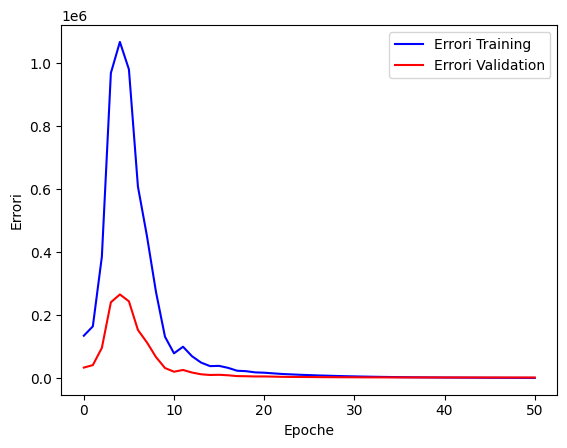

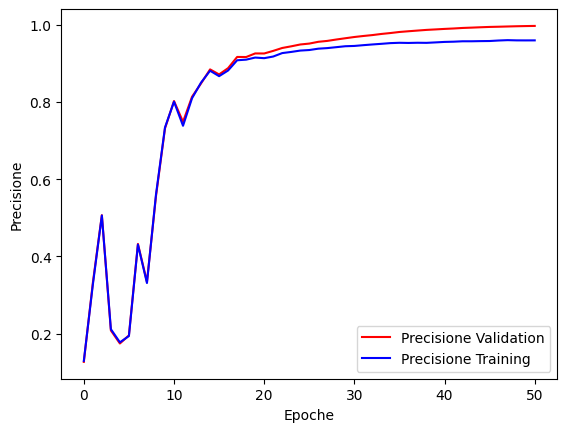

In [3]:
#Stampa grafico dell'errore ottenuto attraverso il training
plt.figure()
plt.plot(train_err, 'b', label='Errori Training')
plt.plot(validation_err, 'r', label='Errori Validation')
plt.xlabel('Epoche')
plt.ylabel('Errori')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accuracy, 'r', label='Precisione Validation')
plt.plot(validation_accuracy, 'b', label='Precisione Training')
plt.xlabel('Epoche')
plt.ylabel('Precisione')
plt.legend()
plt.show()

In [4]:
#Stampa accuracy per training e test set
test_accuracy = training_net.network_accuracy(test_in, test_labels)
print('Test accuracy: ', test_accuracy)
accuracy_training = training_net.network_accuracy(train_in, train_labels)
print('Train accuracy: ', accuracy_training)

Test accuracy:  0.9452229299363057
Train accuracy:  0.9953124023417155


Probabilità predette dalla rete non addestrata:
Classe 0: 3.63742%
Classe 1: 27.3983%
Classe 2: 51.36528%
Classe 3: 5.12132%
Classe 4: 6.92073%
Classe 5: 0.12302%
Classe 6: 1.13367%
Classe 7: 0.75476%
Classe 8: 0.66219%
Classe 9: 2.88331%

Probabilità predette dalla rete addestrata:
Classe 0: 0.0%
Classe 1: 3e-05%
Classe 2: 1e-05%
Classe 3: 99.83262%
Classe 4: 0.00036%
Classe 5: 0.01212%
Classe 6: 0.0%
Classe 7: 0.0%
Classe 8: 0.15486%
Classe 9: 0.0%


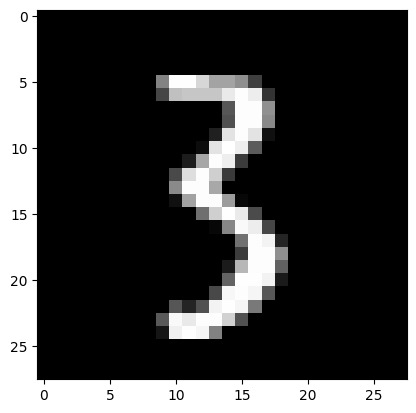

In [5]:
#Predizione rete senza addestramento e rete addestrata
image = 111
ut.test_prediction(net, training_net, image, test_in)